In [10]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Keep only 'Close' price
data = df[['Close']].values

# Normalize between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Prepare training data (e.g., last 80% of the data)
training_data_len = int(len(scaled_data) * 0.8)
train_data = scaled_data[:training_data_len]

x_train, y_train = [], []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i])
    y_train.append(train_data[i])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras import Input

model = Sequential()
model = Sequential()
model.add(Input(shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Output layer

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=32, epochs=5)


Epoch 1/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0146
Epoch 2/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0013
Epoch 3/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0012
Epoch 4/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0011
Epoch 5/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 9.4796e-04


In [12]:
# Prepare test data (last 20%)
test_data = scaled_data[training_data_len - 60:]
x_test, y_test = [], data[training_data_len:]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i])

x_test = np.array(x_test)
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


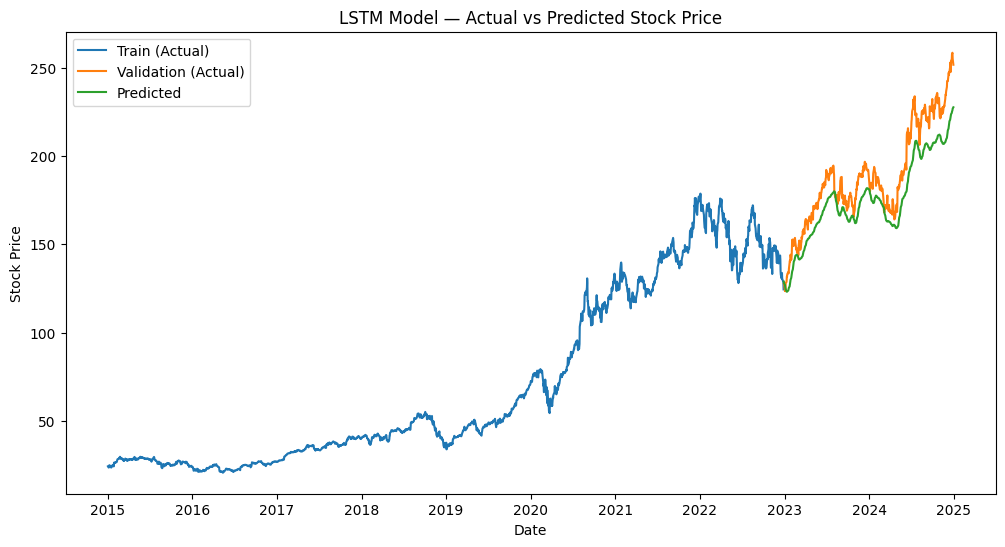

In [16]:
import matplotlib.pyplot as plt

train = df[:training_data_len]
valid = df[training_data_len:]
valid = valid.copy()
valid['Predictions'] = predictions

plt.figure(figsize=(12,6))
plt.title('LSTM Model — Actual vs Predicted Stock Price')
plt.plot(train['Close'], label='Train (Actual)')
plt.plot(valid['Close'], label='Validation (Actual)')
plt.plot(valid['Predictions'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [17]:
model.save("stock_price_lstm_model.keras")  